**import the packages**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the dataset**

In [2]:
data = pd.read_csv("telecom_churn_data.csv")
data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


**Separate categorical columns and Numerical columns**

In [3]:
cat = data.select_dtypes(include="object").columns
num = data.select_dtypes(exclude="object").columns

In [4]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [5]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

**Data Quick checks**

In [6]:
data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [7]:
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [8]:
data.tail()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [9]:
data.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [10]:
data.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [11]:
data.shape

(2000, 16)

In [12]:
data.size

32000

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [14]:
data.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


**Null values analysis**

In [15]:
data.isnull()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [16]:
data.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [17]:
data["year"].nunique() # nunique values in the  year columns

1

In [18]:
len(data["year"].unique())

1

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

**Fill the null  values in categorical  columns**

In [20]:
mode = data["gender"].mode()
data["gender"].fillna(mode.values[0],inplace = True)  # warning comes by using this code then we use bel to fill the
                                                    # column to this  code for ignore warnings

C:\Users\DELL\AppData\Local\Temp\ipykernel_25160\4237234603.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["gender"].fillna(mode.values[0],inplace=True)  # warning comes by using this code then we use bel to fill the


In [21]:
import warnings
warnings.filterwarnings("ignore")


In [22]:
mode = data["gender"].mode()
data["gender"].fillna(mode.values[0],inplace = True)

In [23]:
data.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [24]:
med = data["maximum_days_inactive"].median()
data["maximum_days_inactive"].fillna(med, inplace = True)

In [25]:
data.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive      0
customer_support_calls     0
churn                     35
dtype: int64

In [26]:
med_churn = data["churn"].median()
data["churn"].fillna(med_churn, inplace = True)

In [27]:
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [28]:
data.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

**Drop columns**

In [29]:
data.drop("customer_id",axis=1, inplace=True)

In [30]:
data.drop("phone_no",axis=1, inplace=True)

In [31]:
data.drop( "year",axis=1, inplace=True)

In [32]:
data.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [33]:
data.shape

(2000, 13)

**Create a frequency table by usnig categorical columns**

In [34]:
data["gender"].value_counts()

gender
Male      1077
Female     923
Name: count, dtype: int64

In [35]:
data["multi_screen"].value_counts()

multi_screen
no     1802
yes     198
Name: count, dtype: int64

In [36]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [37]:
freq_table_cat1 = data['mail_subscribed'].value_counts().reset_index()
#freq_table_cat1.columns = ["category","frequncy"]
freq_table_cat1


,mail_subscribed,count
0,no,1430
1,yes,570


In [38]:
freq_table_cat2 = data['multi_screen'].value_counts().reset_index()
freq_table_cat2

,multi_screen,count
0,no,1802
1,yes,198


In [39]:
freq_table_cat3 = data['gender'].value_counts().reset_index()
freq_table_cat3

,gender,count
0,Male,1077
1,Female,923


In [40]:
cat = data.select_dtypes(include="object").columns
num = data.select_dtypes(exclude="object").columns

In [41]:
cat, num

(Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object'),
 Index(['age', 'no_of_days_subscribed', 'weekly_mins_watched',
        'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
        'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
        'churn'],
       dtype='object'))



**Barchats**

- Bar chats are representation of Frequency tables

- It is under matplotilb package

- The method name is **bar**

    - plt.bar

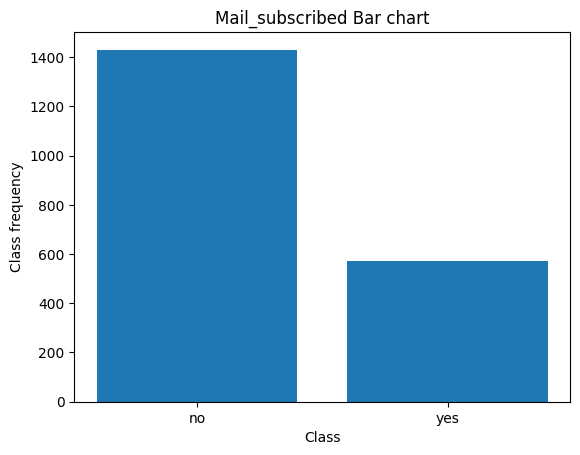

In [42]:
# Bar mail_subscribed  from data

keys = data['mail_subscribed'].value_counts().keys()
values = data['mail_subscribed'].value_counts().values
plt.bar(keys,values)
plt.title("Mail_subscribed Bar chart")
plt.xlabel("Class")
plt.ylabel("Class frequency")
plt.show()

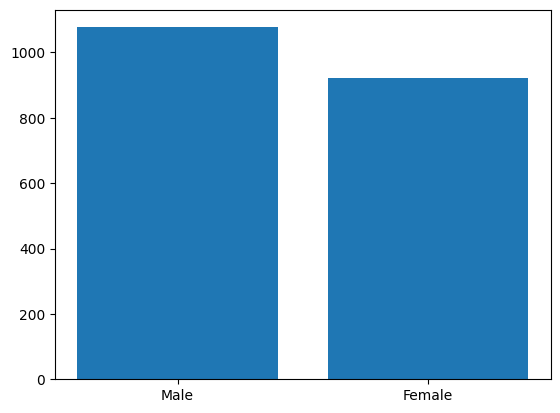

In [43]:
keys1 = data["gender"].value_counts().keys()
values1 = data["gender"].value_counts().values
plt.bar(keys1,values1)
plt.show()

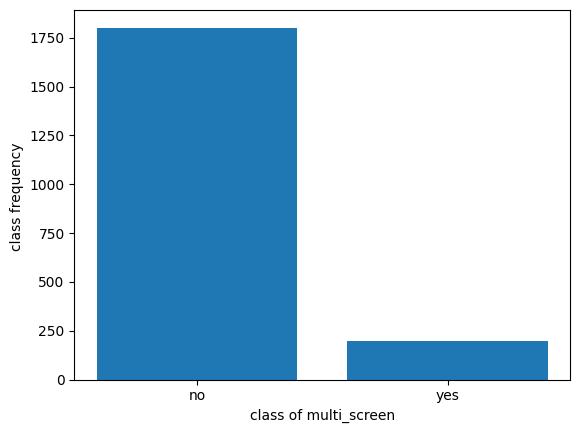

In [44]:
keys2 = data["multi_screen"].value_counts().keys()
values2 = data["multi_screen"].value_counts().values

plt.bar(keys2,values2)
plt.xlabel("class of multi_screen")
plt.ylabel("class frequency ")
plt.show()

**count plot**

<Axes: xlabel='mail_subscribed', ylabel='count'>

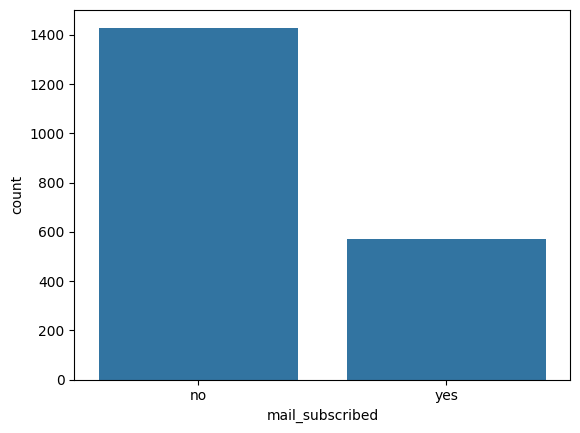

In [45]:
df = data["mail_subscribed"].value_counts().keys()
sns.countplot(data = data,x = "mail_subscribed")

**subplot**

<Axes: xlabel='multi_screen', ylabel='count'>

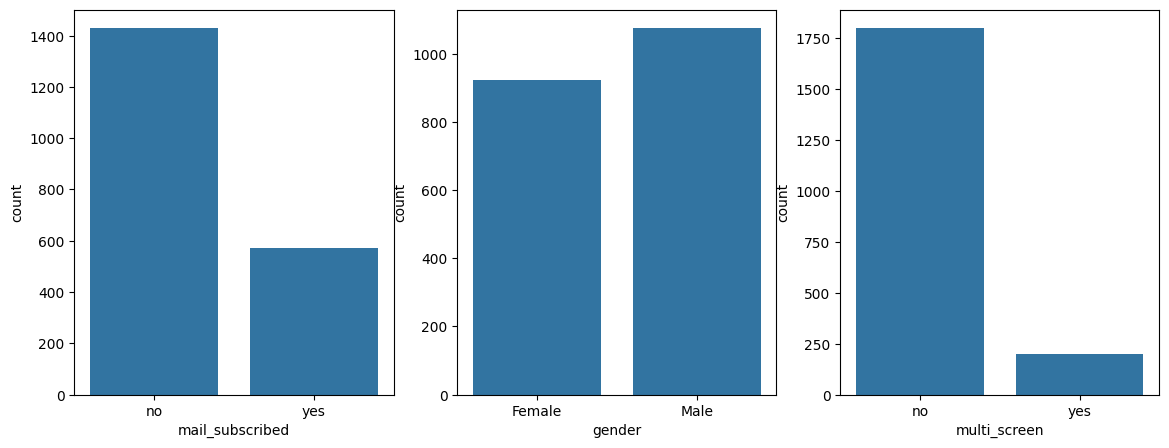

In [46]:
plt.figure(figsize=(14,5))
keys = data['mail_subscribed'].value_counts().keys()
plt.subplot(1,3,1)

sns.countplot(data = data,x = "mail_subscribed")
######################################################
keys = data['gender'].value_counts().keys()
plt.subplot(1,3,2)

sns.countplot(data = data,x = "gender")
##############################################################
keys = data['multi_screen'].value_counts().keys()
plt.subplot(1,3,3)
sns.countplot(data = data,x = "multi_screen",)

**pie chart**

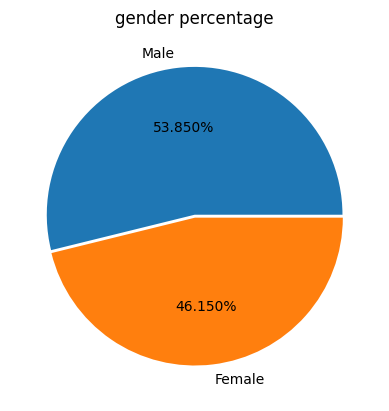

In [47]:
keys = data['gender'].value_counts().keys()
values = data['gender'].value_counts().values
plt.pie(values,labels=keys,autopct="%0.3f%%",radius= 1,explode=[0.01,0.01])
plt.title("gender percentage")
plt.show()

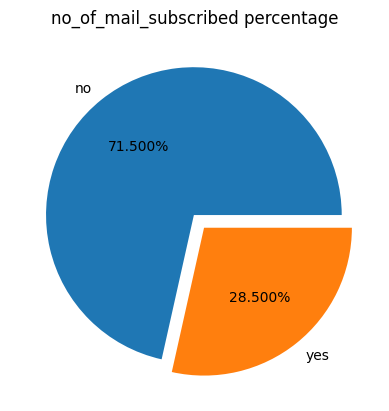

In [48]:
keys = data['mail_subscribed'].value_counts().keys()
values = data['mail_subscribed'].value_counts().values
plt.pie(values,labels=keys,autopct="%0.3f%%",radius= 1,explode=[0.01,0.1])
plt.title("no_of_mail_subscribed percentage")
plt.show()

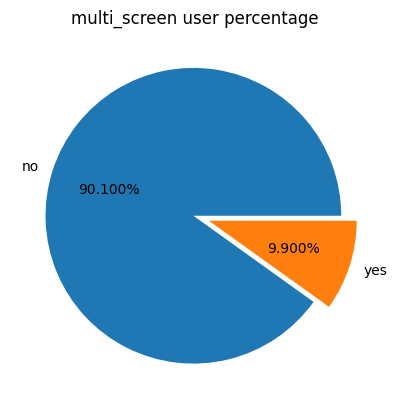

In [49]:
keys = data['multi_screen'].value_counts().keys()
values = data['multi_screen'].value_counts().values
plt.pie(values,labels=keys,autopct="%0.3f%%",radius= 1,explode=[0.01,0.1])
plt.title("multi_screen user percentage")
plt.show()

**Numerical columns analysis**

**Histograme**

- Class interval vs Interval Frequency

- It is available in matplotlib package

- **plt.hist**

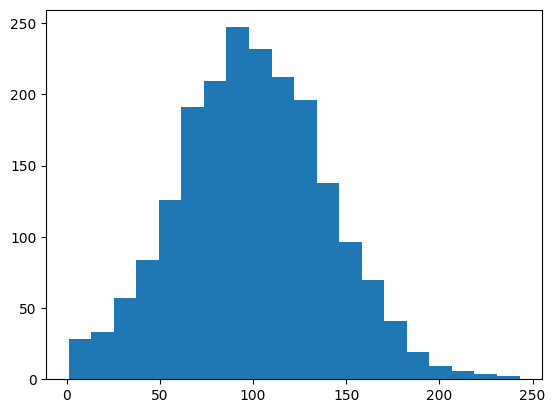

In [50]:
plt.hist(data["no_of_days_subscribed"],bins= 20)
plt.show()

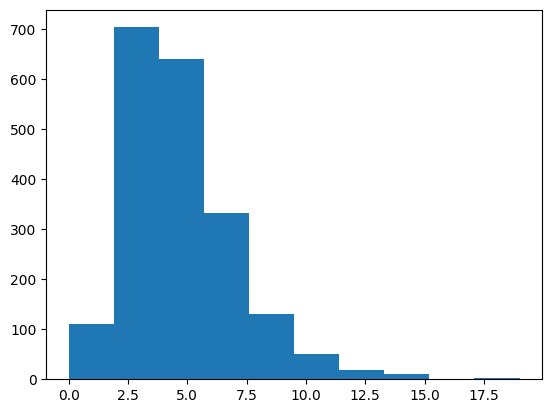

In [51]:
plt.hist(data["videos_watched"])
plt.show()

**Age Histogram**

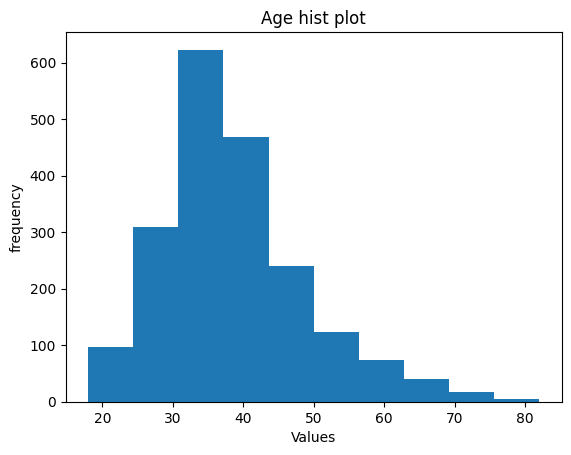

In [52]:

plt.hist(data["age"])
plt.title("Age hist plot")
plt.xlabel("Values")
plt.ylabel("frequency")
plt.show()


In [53]:
num

Index(['age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn'],
      dtype='object')

**All numerical columns histogram plot**

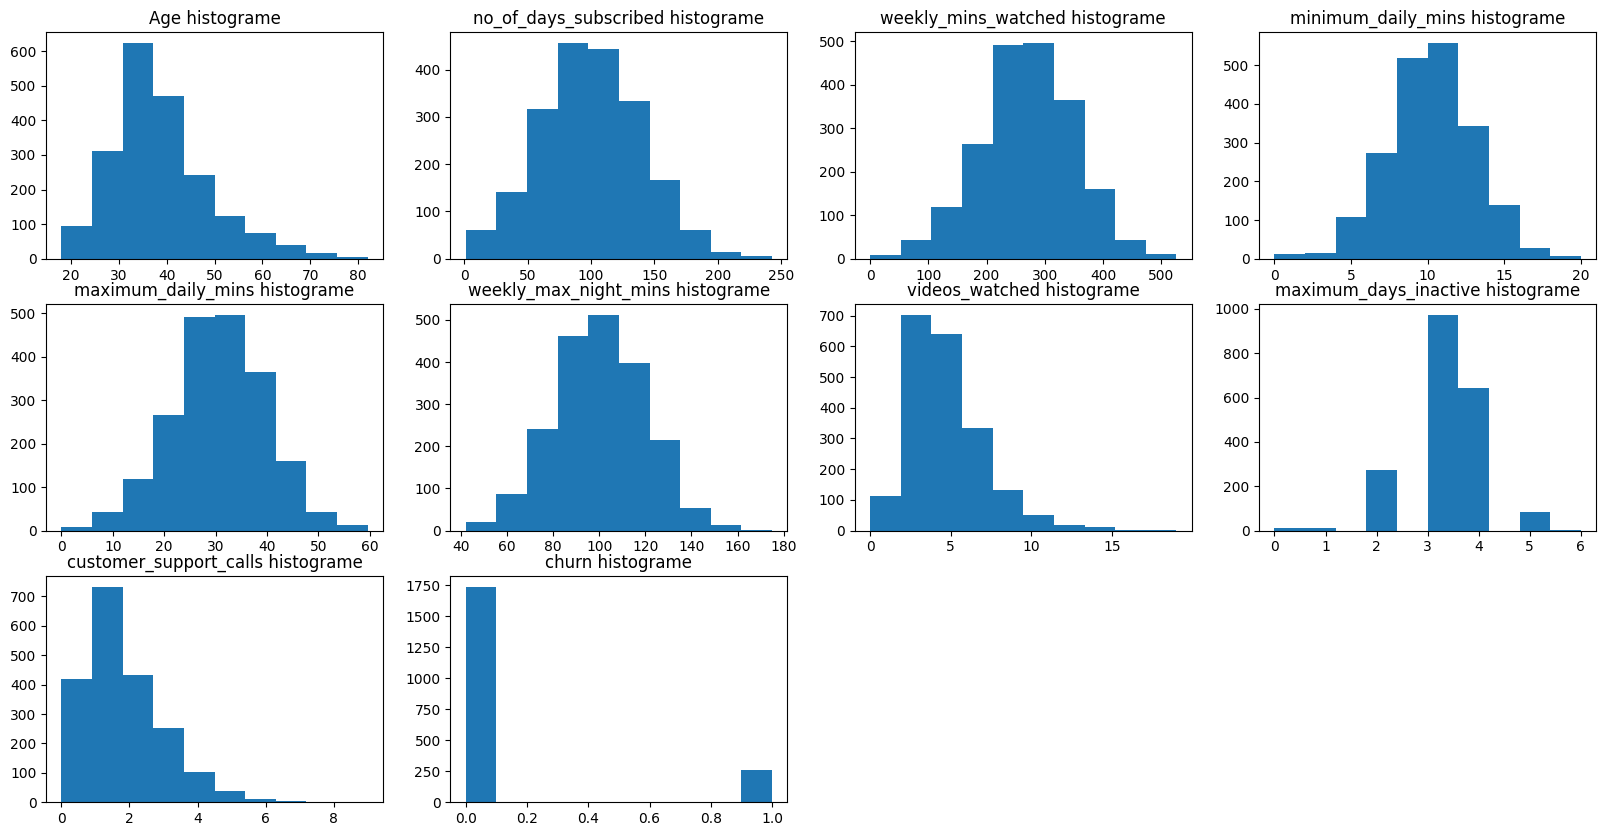

In [54]:

plt.figure(figsize=(20,10))
#plt.suptitle("wage plots")
plt.subplot(3,4,1) 
plt.hist(data["age"])
plt.title("Age histograme")
#############
plt.subplot(3,4,2) 
plt.hist(data["no_of_days_subscribed"])
plt.title("no_of_days_subscribed histograme")
###########
plt.subplot(3,4,3) 
plt.hist(data["weekly_mins_watched"])
plt.title("weekly_mins_watched histograme")
#############
plt.subplot(3,4,4) 
plt.hist(data["minimum_daily_mins"])
plt.title("minimum_daily_mins histograme")
##############
plt.subplot(3,4,5) 
plt.hist(data["maximum_daily_mins"])
plt.title("maximum_daily_mins histograme")
##############
plt.subplot(3,4,6) 
plt.hist(data["weekly_max_night_mins"])
plt.title("weekly_max_night_mins histograme")
##############
plt.subplot(3,4,7) 
plt.hist(data["videos_watched"])
plt.title("videos_watched histograme")
############
plt.subplot(3,4,8) 
plt.hist(data["maximum_days_inactive"])
plt.title("maximum_days_inactive histograme")
############
plt.subplot(3,4,9) 
plt.hist(data["customer_support_calls"])
plt.title("customer_support_calls histograme")
############
plt.subplot(3,4,10) 
plt.hist(data["churn"])
plt.title("churn histograme")
plt.show()

**Boxplot with outlier**

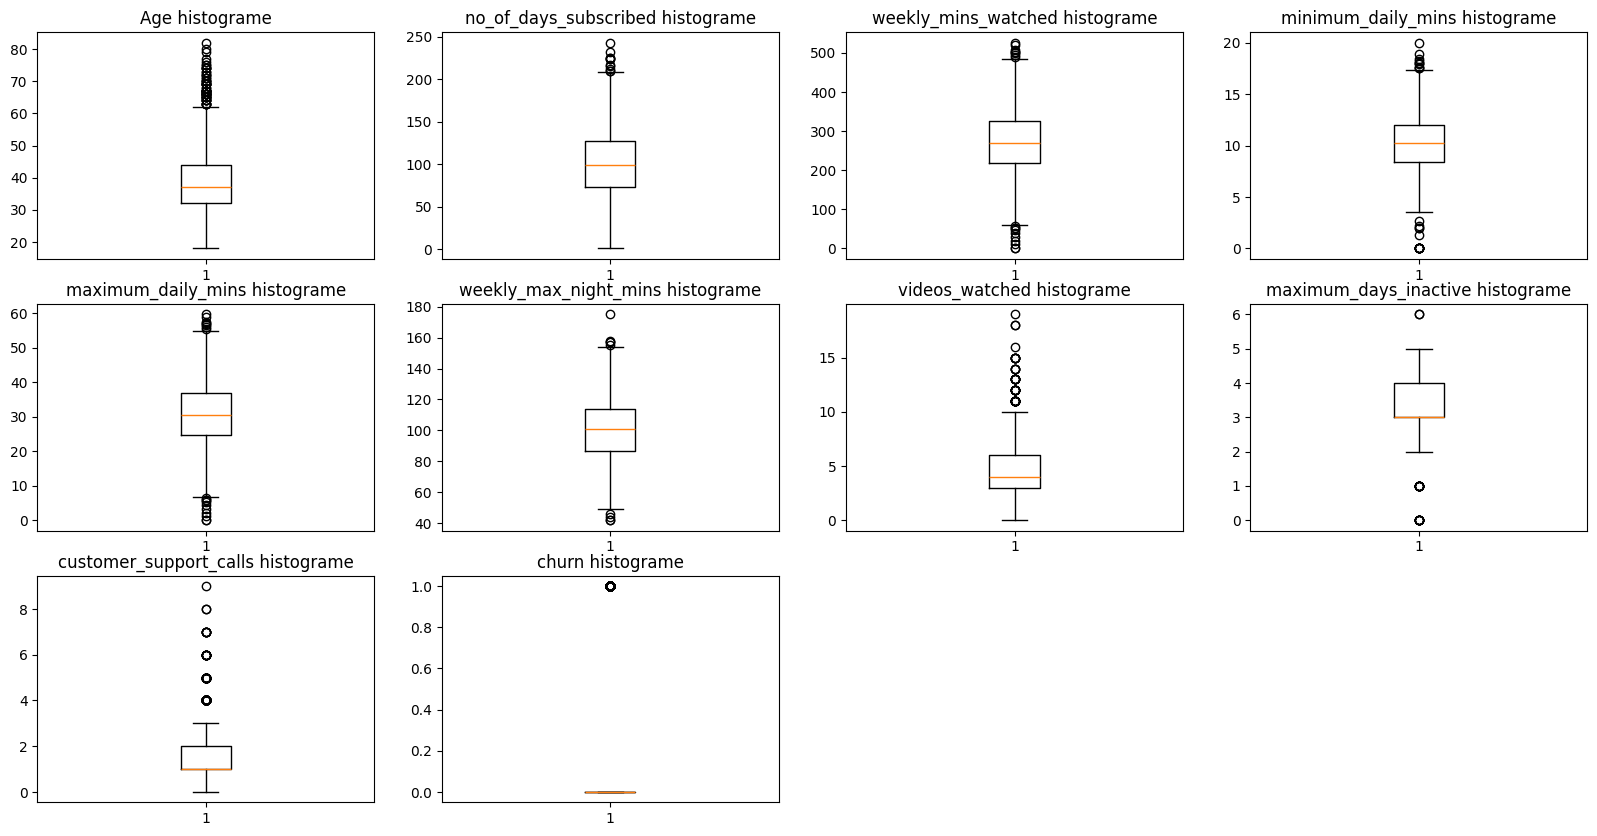

In [55]:
# all numerical columns boxplot with outlier
plt.figure(figsize=(20,10))
#plt.suptitle("wage plots")
plt.subplot(3,4,1) 
plt.boxplot(data["age"])
plt.title("Age histograme")
#############
plt.subplot(3,4,2) 
plt.boxplot(data["no_of_days_subscribed"])
plt.title("no_of_days_subscribed histograme")
###########
plt.subplot(3,4,3) 
plt.boxplot(data["weekly_mins_watched"])
plt.title("weekly_mins_watched histograme")
#############
plt.subplot(3,4,4) 
plt.boxplot(data["minimum_daily_mins"])
plt.title("minimum_daily_mins histograme")
##############
plt.subplot(3,4,5) 
plt.boxplot(data["maximum_daily_mins"])
plt.title("maximum_daily_mins histograme")
##############
plt.subplot(3,4,6) 
plt.boxplot(data["weekly_max_night_mins"])
plt.title("weekly_max_night_mins histograme")
##############
plt.subplot(3,4,7) 
plt.boxplot(data["videos_watched"])
plt.title("videos_watched histograme")
############
plt.subplot(3,4,8) 
plt.boxplot(data["maximum_days_inactive"])
plt.title("maximum_days_inactive histograme")
############
plt.subplot(3,4,9) 
plt.boxplot(data["customer_support_calls"])
plt.title("customer_support_calls histograme")
############
plt.subplot(3,4,10) 
plt.boxplot(data["churn"])
plt.title("churn histograme")
plt.show()

**All numerical columns histplot**

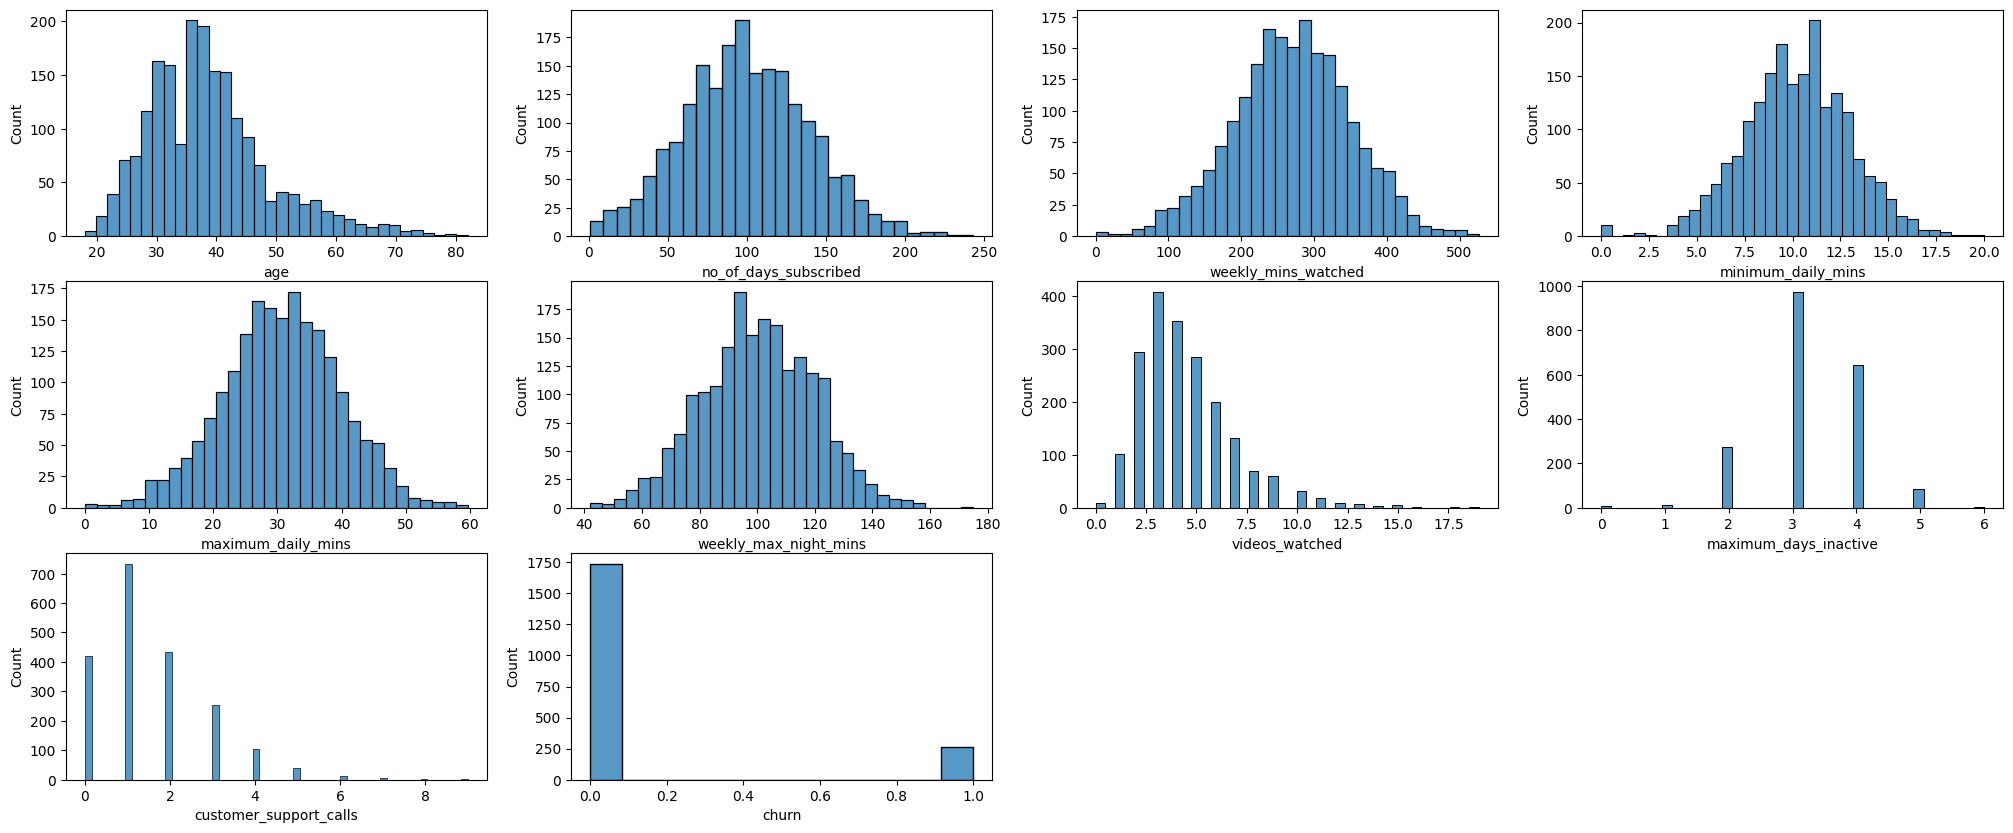

In [56]:
plt.figure(figsize=(25,10))
plt.subplot(3,4,1) 
sns.histplot(data["age"])
plt.subplot(3,4,2) 
sns.histplot(data["no_of_days_subscribed"])
plt.subplot(3,4,3) 
sns.histplot(data["weekly_mins_watched"])
plt.subplot(3,4,4) 
sns.histplot(data["minimum_daily_mins"])
plt.subplot(3,4,5) 
sns.histplot(data["maximum_daily_mins"])
plt.subplot(3,4,6) 
sns.histplot(data["weekly_max_night_mins"])
plt.subplot(3,4,7) 
sns.histplot(data["videos_watched"])
plt.subplot(3,4,8) 
sns.histplot(data["maximum_days_inactive"])
plt.subplot(3,4,9) 
sns.histplot(data["customer_support_calls"])
plt.subplot(3,4,10) 
sns.histplot(data["churn"])
plt.show()


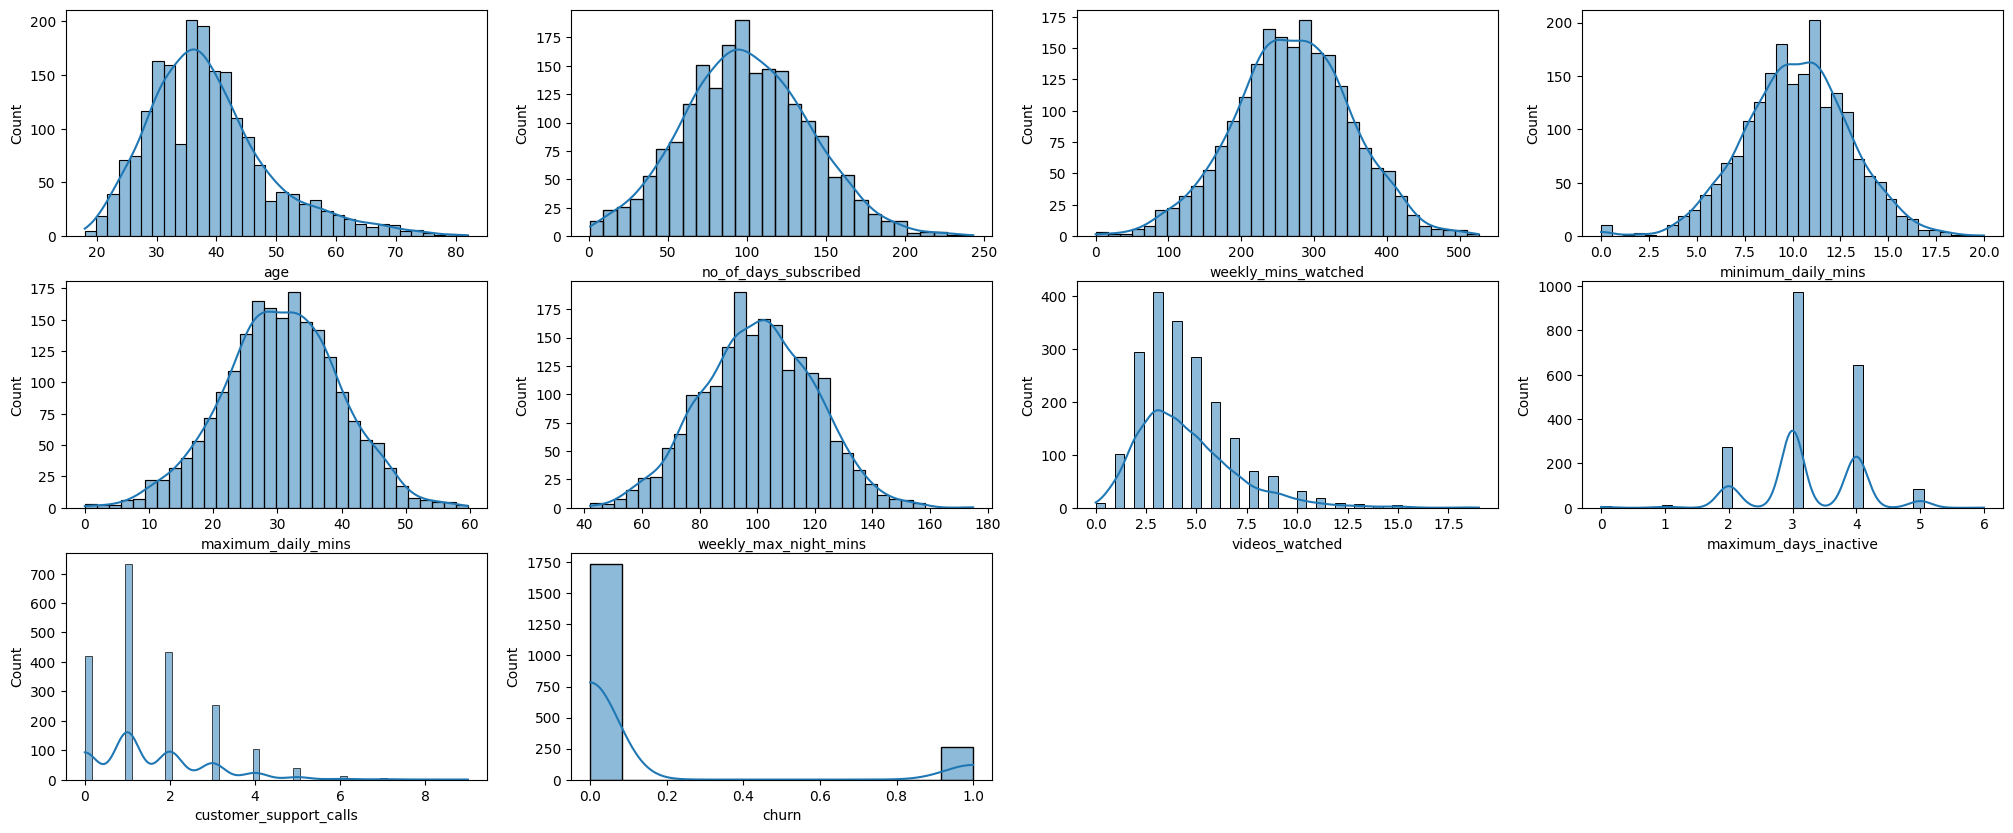

In [57]:
plt.figure(figsize=(25,10))
plt.subplot(3,4,1) 
sns.histplot(data["age"],kde=True)
plt.subplot(3,4,2) 
sns.histplot(data["no_of_days_subscribed"],kde=True)
plt.subplot(3,4,3) 
sns.histplot(data["weekly_mins_watched"],kde=True)
plt.subplot(3,4,4) 
sns.histplot(data["minimum_daily_mins"],kde=True)
plt.subplot(3,4,5) 
sns.histplot(data["maximum_daily_mins"],kde=True)
plt.subplot(3,4,6) 
sns.histplot(data["weekly_max_night_mins"],kde=True)
plt.subplot(3,4,7) 
sns.histplot(data["videos_watched"],kde=True)
plt.subplot(3,4,8) 
sns.histplot(data["maximum_days_inactive"],kde=True)
plt.subplot(3,4,9) 
sns.histplot(data["customer_support_calls"],kde=True)
plt.subplot(3,4,10) 
sns.histplot(data["churn"],kde=True)
plt.show()

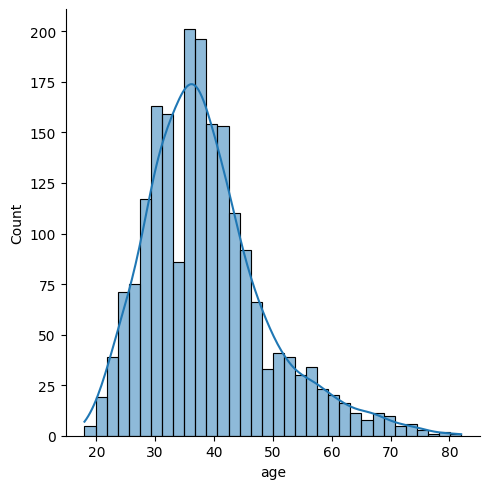

In [58]:
# distribution plot of age
sns.displot(data["age"], kde = True)

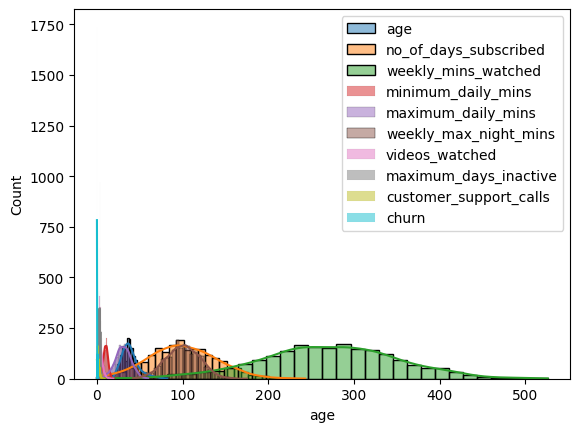

In [59]:
cat = data.select_dtypes(include="object").columns
num = data.select_dtypes(exclude="object").columns
##################################################

# Plotting using seaborn
for column in num:
    sns.histplot(data[column], kde=True, label=column)
plt.legend()    
plt.show()

    

In [60]:
col1 = data["videos_watched"]
col2 = data["gender"]
r1 = pd.crosstab(col1,col2)

<Axes: xlabel='videos_watched'>

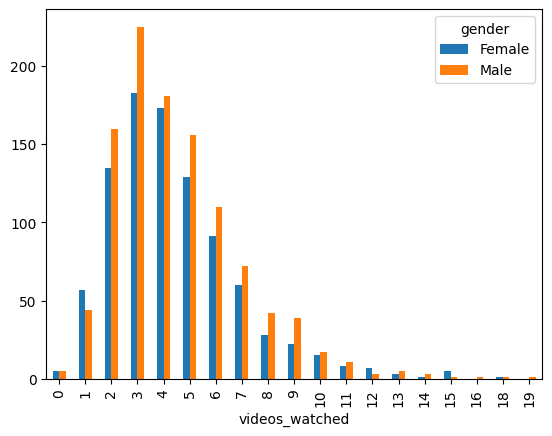

In [61]:
r1.plot(kind = "bar")

**Remove the outlier using median**

In [62]:
# wage_data =data["age"]
# q1 = round(np.quantile(wage_data,0.25),2)
# q3 = round(np.quantile(wage_data,0.75),2)
# # q1,q3
# IQR = q3-q1
# # IQR
# lb = q1-1.5*IQR
# ub = q3+1.5*IQR
# con1 = data["age"]>lb
# con2 = data["age"]<ub
# con3 = con1&con2
# count = len(data[con3])
# non_outlier_data = data[con3]
# non_outlier_data

In [63]:

# # Function to remove outliers using the median, only for numeric columns
# def remove_outliers_median(data):
#     # Select only numeric columns
#     numeric_data = data.select_dtypes(include=[np.number])
    
#     for column in numeric_data.columns:
#         # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#         Q1 = numeric_data[column].quantile(0.25)
#         Q3 = numeric_data[column].quantile(0.75)
#         IQR = Q3 - Q1
        
#         # Define outlier limits
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Replace outliers with the median of the column
#         median = numeric_data[column].median()
#         numeric_data[column] = np.where((numeric_data[column] < lower_bound) | (numeric_data[column] > upper_bound), median, numeric_data[column])
    
#     # Update the original dataframe's numeric columns with the cleaned data
#     data[numeric_data.columns] = numeric_data
    
#     return data

# # Remove outliers and retain original DataFrame structure
# df_cleaned = remove_outliers_median(data)
# print(df_cleaned)

In [64]:
data.shape

(2000, 13)

In [65]:

# Function to remove outliers using the median
def remove_outliers_median(data):
    for column in num:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier limits
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median of the column
        median = data[column].median()
        data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])
    
    return data

# Remove outliers
df_cleaned = remove_outliers_median(data)
print(df_cleaned)

      gender   age  no_of_days_subscribed multi_screen mail_subscribed  \
0     Female  36.0                   62.0           no              no   
1     Female  39.0                  149.0           no              no   
2     Female  37.0                  126.0           no              no   
3     Female  24.0                  131.0           no             yes   
4     Female  40.0                  191.0           no              no   
...      ...   ...                    ...          ...             ...   
1995  Female  54.0                   75.0           no             yes   
1996    Male  45.0                  127.0           no              no   
1997    Male  53.0                   94.0           no              no   
1998    Male  40.0                   94.0           no              no   
1999    Male  37.0                   73.0           no              no   

      weekly_mins_watched  minimum_daily_mins  maximum_daily_mins  \
0                  148.35                1

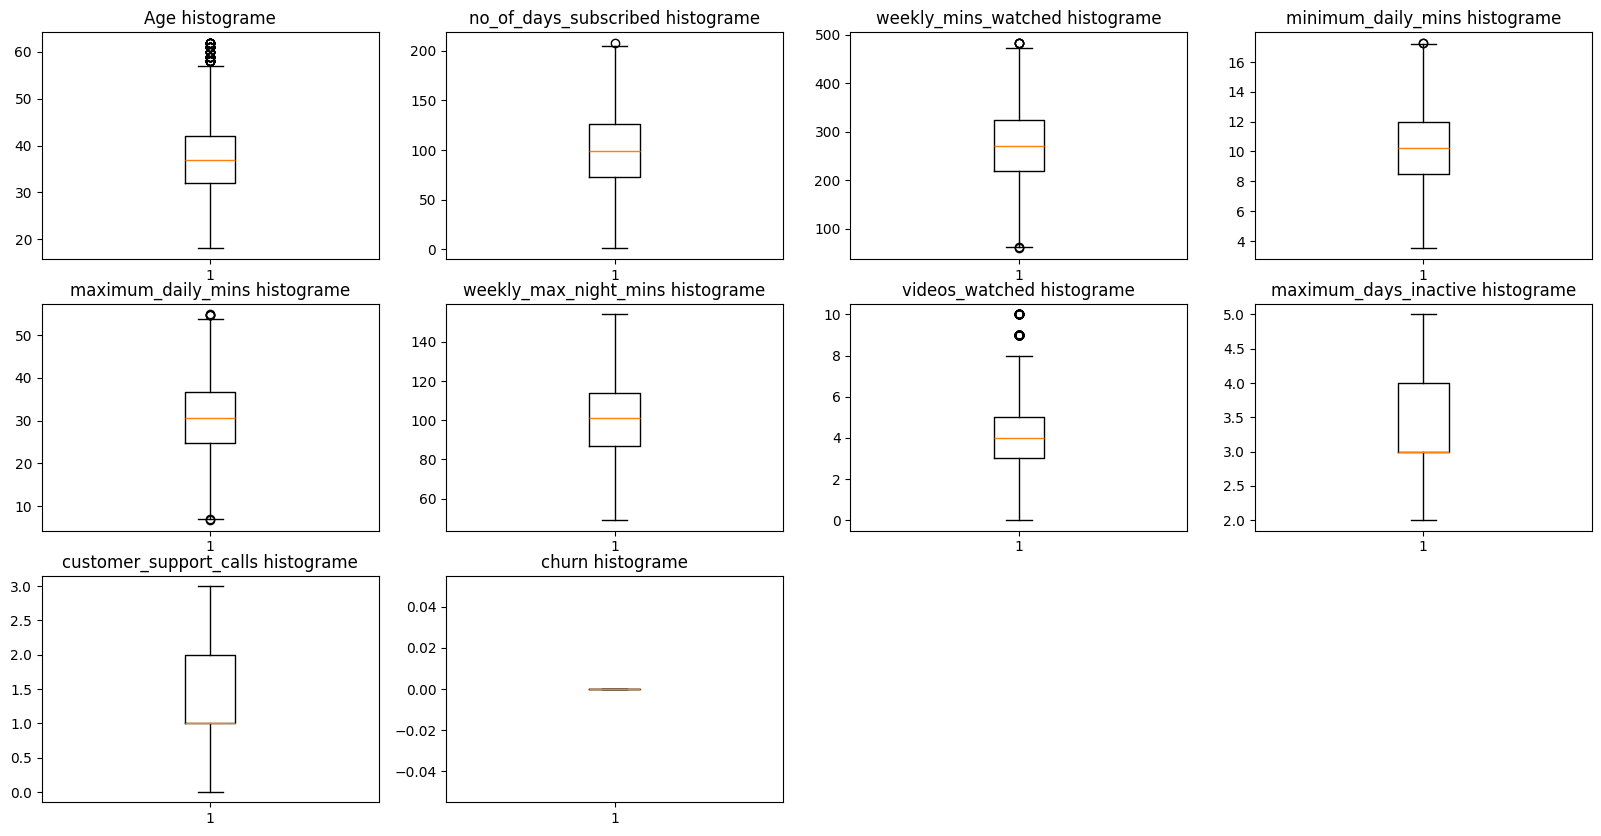

In [66]:
# all numerical columns boxplot with outlier
plt.figure(figsize=(20,10))
#plt.suptitle("wage plots")
plt.subplot(3,4,1) 
plt.boxplot(data["age"])
plt.title("Age histograme")
#############
plt.subplot(3,4,2) 
plt.boxplot(data["no_of_days_subscribed"])
plt.title("no_of_days_subscribed histograme")
###########
plt.subplot(3,4,3) 
plt.boxplot(data["weekly_mins_watched"])
plt.title("weekly_mins_watched histograme")
#############
plt.subplot(3,4,4) 
plt.boxplot(data["minimum_daily_mins"])
plt.title("minimum_daily_mins histograme")
##############
plt.subplot(3,4,5) 
plt.boxplot(data["maximum_daily_mins"])
plt.title("maximum_daily_mins histograme")
##############
plt.subplot(3,4,6) 
plt.boxplot(data["weekly_max_night_mins"])
plt.title("weekly_max_night_mins histograme")
##############
plt.subplot(3,4,7) 
plt.boxplot(data["videos_watched"])
plt.title("videos_watched histograme")
############
plt.subplot(3,4,8) 
plt.boxplot(data["maximum_days_inactive"])
plt.title("maximum_days_inactive histograme")
############
plt.subplot(3,4,9) 
plt.boxplot(data["customer_support_calls"])
plt.title("customer_support_calls histograme")
############
plt.subplot(3,4,10) 
plt.boxplot(data["churn"])
plt.title("churn histograme")
plt.show()

**Corr relation in numerical columns**

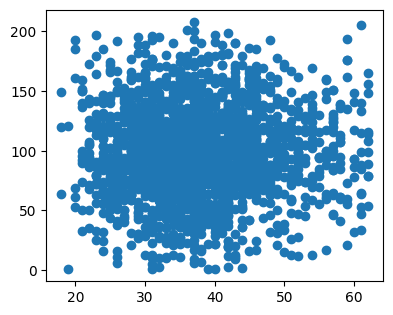

In [67]:
plt.figure(figsize=(20,12))
plt.subplot(3,4,1).scatter(data["age"],data["no_of_days_subscribed"])
plt.show()

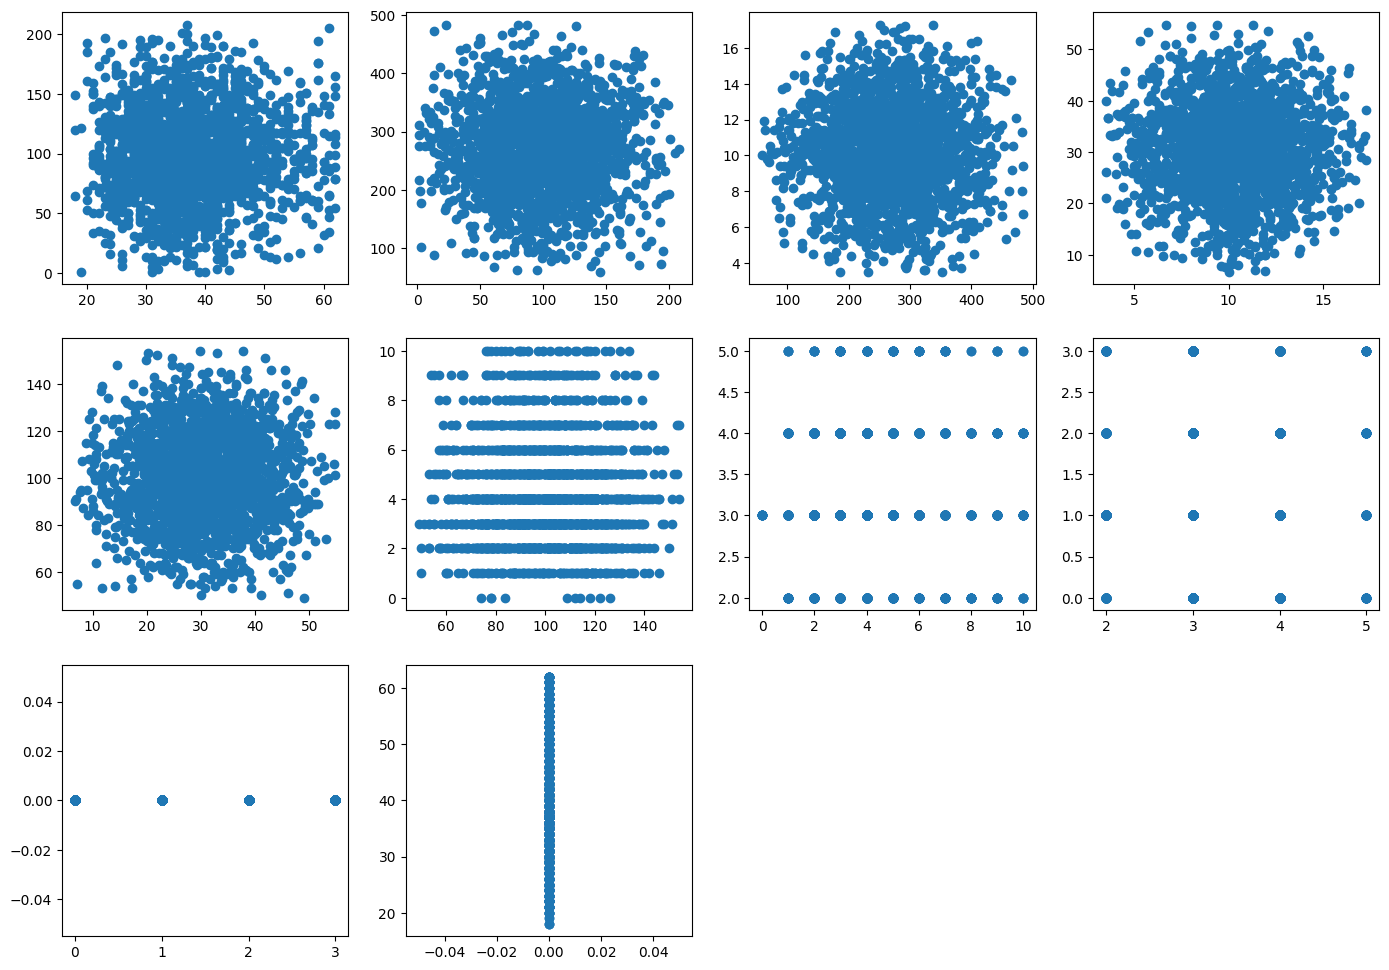

In [68]:
cols1 = data["age"]
cols2 = data["no_of_days_subscribed"]
cols3 = data["weekly_mins_watched"]
cols4 = data["minimum_daily_mins"]
cols5 = data["maximum_daily_mins"]
cols6 = data["weekly_max_night_mins"]
cols7 = data["videos_watched"]
cols8 = data["maximum_days_inactive"]
cols9 = data["customer_support_calls"]
cols10 = data["churn"]
plt.figure(figsize=(17,12))
plt.subplot(3,4,1).scatter(cols1,cols2)
plt.subplot(3,4,2).scatter(cols2,cols3)
plt.subplot(3,4,3).scatter(cols3,cols4)
plt.subplot(3,4,4).scatter(cols4,cols5)
plt.subplot(3,4,5).scatter(cols5,cols6)
plt.subplot(3,4,6).scatter(cols6,cols7)
plt.subplot(3,4,7).scatter(cols7,cols8)
plt.subplot(3,4,8).scatter(cols8,cols9)
plt.subplot(3,4,9).scatter(cols9,cols10)
plt.subplot(3,4,10).scatter(cols10,cols1)


In [69]:
data.corr(numeric_only=True)

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
age,1.000000,0.020416,0.016250,0.011062,0.016265,0.012450,0.002979,0.028392,-0.007193,NaN
no_of_days_subscribed,0.020416,1.000000,0.001131,0.039527,0.001123,0.003276,0.041836,0.036450,-0.014171,NaN
weekly_mins_watched,0.016250,0.001131,1.000000,-0.017170,1.000000,0.023476,-0.006443,-0.015092,-0.016288,NaN
minimum_daily_mins,0.011062,0.039527,-0.017170,1.000000,-0.017167,0.015625,0.025090,0.897625,-0.005016,NaN
maximum_daily_mins,0.016265,0.001123,1.000000,-0.017167,1.000000,0.023479,-0.006435,-0.015091,-0.016295,NaN
weekly_max_night_mins,0.012450,0.003276,0.023476,0.015625,0.023479,1.000000,0.004222,0.027609,0.013888,NaN
videos_watched,0.002979,0.041836,-0.006443,0.025090,-0.006435,0.004222,1.000000,0.013056,0.018412,NaN
maximum_days_inactive,0.028392,0.036450,-0.015092,0.897625,-0.015091,0.027609,0.013056,1.000000,0.000778,NaN
customer_support_calls,-0.007193,-0.014171,-0.016288,-0.005016,-0.016295,0.013888,0.018412,0.000778,1.000000,NaN
churn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

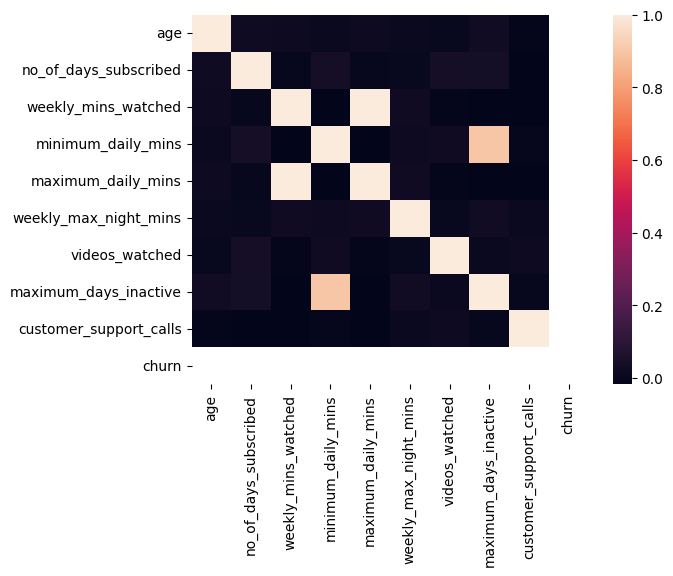

In [70]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr)

In [71]:
data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36.0,62.0,no,no,148.35,12.2,16.81,82.0,1.0,4.0,1.0,0.0
1,Female,39.0,149.0,no,no,294.45,7.7,33.37,87.0,3.0,3.0,2.0,0.0
2,Female,37.0,126.0,no,no,87.30,11.9,9.89,91.0,1.0,4.0,1.0,0.0
3,Female,24.0,131.0,no,yes,321.30,9.5,36.41,102.0,4.0,3.0,3.0,0.0
4,Female,40.0,191.0,no,no,243.00,10.9,27.54,83.0,7.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54.0,75.0,no,yes,182.25,11.3,20.66,97.0,5.0,4.0,2.0,0.0
1996,Male,45.0,127.0,no,no,273.45,9.3,30.99,116.0,3.0,3.0,1.0,0.0
1997,Male,53.0,94.0,no,no,128.85,15.6,14.60,110.0,4.0,5.0,0.0,0.0
1998,Male,40.0,94.0,no,no,178.05,10.4,20.18,100.0,6.0,3.0,3.0,0.0


**convert cat columns to numerical by  using LabelEncoder class**

In [72]:
# data = pd.read_csv("telecom_churn_data.csv")

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat[:]:
    data[i]=le.fit_transform(data[i])

data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36.0,62.0,0,0,148.35,12.2,16.81,82.0,1.0,4.0,1.0,0.0
1,0,39.0,149.0,0,0,294.45,7.7,33.37,87.0,3.0,3.0,2.0,0.0
2,0,37.0,126.0,0,0,87.30,11.9,9.89,91.0,1.0,4.0,1.0,0.0
3,0,24.0,131.0,0,1,321.30,9.5,36.41,102.0,4.0,3.0,3.0,0.0
4,0,40.0,191.0,0,0,243.00,10.9,27.54,83.0,7.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,54.0,75.0,0,1,182.25,11.3,20.66,97.0,5.0,4.0,2.0,0.0
1996,1,45.0,127.0,0,0,273.45,9.3,30.99,116.0,3.0,3.0,1.0,0.0
1997,1,53.0,94.0,0,0,128.85,15.6,14.60,110.0,4.0,5.0,0.0,0.0
1998,1,40.0,94.0,0,0,178.05,10.4,20.18,100.0,6.0,3.0,3.0,0.0


In [73]:
data.shape

(2000, 13)

In [74]:
data["churn"].unique()

array([0.])

**StandardScaler**


In [75]:

from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()


# Select specific numeric columns for scaling
numeric_columns = ['age', 'no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
                   'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive', 'customer_support_calls', 'churn']

# Ensure these columns exist in the DataFrame
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])



In [76]:
data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,-0.196365,-0.958187,0,0,-1.579444,0.758523,-1.579855,-0.961376,-1.572207,0.978053,-0.279328,0.0
1,0,0.152005,1.290199,0,0,0.310695,-0.974231,0.310522,-0.699877,-0.607515,-0.363584,0.795010,0.0
2,0,-0.080241,0.695798,0,0,-2.369266,0.643006,-2.369794,-0.490677,-1.572207,0.978053,-0.279328,0.0
3,0,-1.589844,0.825015,0,1,0.658061,-0.281130,0.657547,0.084621,-0.125169,-0.363584,1.869347,0.0
4,0,0.268129,2.375626,0,0,-0.354929,0.257949,-0.354991,-0.909076,1.321869,-0.363584,-0.279328,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1.893855,-0.622221,0,1,-1.140870,0.411972,-1.140365,-0.176878,0.357177,0.978053,0.795010,0.0
1996,1,0.848745,0.721641,0,0,0.039012,-0.358141,0.038837,0.816819,-0.607515,-0.363584,-0.279328,0.0
1997,1,1.777732,-0.131195,0,0,-1.831721,2.067714,-1.832133,0.503020,-0.125169,2.319690,-1.353665,0.0
1998,1,0.268129,-0.131195,0,0,-1.195206,0.065421,-1.195158,-0.019979,0.839523,-0.363584,1.869347,0.0


In [77]:
data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,-0.196365,-0.958187,0,0,-1.579444,0.758523,-1.579855,-0.961376,-1.572207,0.978053,-0.279328,0.0
1,0,0.152005,1.290199,0,0,0.310695,-0.974231,0.310522,-0.699877,-0.607515,-0.363584,0.795010,0.0
2,0,-0.080241,0.695798,0,0,-2.369266,0.643006,-2.369794,-0.490677,-1.572207,0.978053,-0.279328,0.0
3,0,-1.589844,0.825015,0,1,0.658061,-0.281130,0.657547,0.084621,-0.125169,-0.363584,1.869347,0.0
4,0,0.268129,2.375626,0,0,-0.354929,0.257949,-0.354991,-0.909076,1.321869,-0.363584,-0.279328,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1.893855,-0.622221,0,1,-1.140870,0.411972,-1.140365,-0.176878,0.357177,0.978053,0.795010,0.0
1996,1,0.848745,0.721641,0,0,0.039012,-0.358141,0.038837,0.816819,-0.607515,-0.363584,-0.279328,0.0
1997,1,1.777732,-0.131195,0,0,-1.831721,2.067714,-1.832133,0.503020,-0.125169,2.319690,-1.353665,0.0
1998,1,0.268129,-0.131195,0,0,-1.195206,0.065421,-1.195158,-0.019979,0.839523,-0.363584,1.869347,0.0
